Часть 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Задание 1
import numpy as np
import pandas as pd
def make_data(n, seed):
 np.random.seed(seed)
 shift_matrix = np.array([[3, 3],
 [6, 9],
 [9, 3]])

 data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
 data = np.swapaxes(data, 1, 2)
 data = data.reshape((-1, 2))
 data *= np.array([[20, 0.5]])

 df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
 columns=['x', 'y'])
 df = df.sample(frac=1.0)
 return df

Функция для создания набора данных. Данная функция создаёт 3 кластера, в каждом кластере по 2 признака и n количество значений. seed - число, которое отвечает за одинаковую воспроизводимость значений.

In [ ]:
#Задание 2
df = make_data(n=50, seed=42)
print(df.head())

             x         y
33   38.845781  1.240865
23   31.505036  2.282322
50   91.692585  4.625246
63  169.264842  4.089659
88  136.270344  4.076603


Вывод полученного в результате работы функции датафрейма с двумя признаками x и y

In [ ]:
#Задание 3
# Стандартизация
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Преобразуем обратно в DataFrame
df_standardized = pd.DataFrame(df_scaled, columns=['x', 'y'])
print("Средние (округлённые до 10 знаков):")
print(df_standardized.mean().round(10))

print("\nСтандартные отклонения:")
print(df_standardized.std())

Средние (округлённые до 10 знаков):
x    0.0
y   -0.0
dtype: float64

Стандартные отклонения:
x    1.00335
y    1.00335
dtype: float64


С помощью StandardScaler() выполняется стандартизация данных, поскольку метод кластеризации работает только на стандартизированных данных. После стандартизации данные преобразуются обратно в датафрейм.

In [ ]:
#Задание 4
# Обучение KMeans и предсказание меток
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Добавляем метки кластеров в датафрейм
df_result = df.copy()
df_result['cluster'] = labels
print(df_result.head(20))

              x         y  cluster
33    38.845781  1.240865        2
23    31.505036  2.282322        2
50    91.692585  4.625246        0
63   169.264842  4.089659        0
88   136.270344  4.076603        0
78   121.993027  4.367672        0
87   113.558770  4.463586        0
1     57.234714  1.307459        2
72   148.055886  4.461449        0
46    50.787225  1.648060        2
79   109.930487  5.860085        0
134  222.878882  2.566517        1
117  175.263628  0.784929        1
135  192.678380  0.523956        1
113  193.027825  0.987806        1
43    53.977926  1.336169        2
62   121.204604  5.079298        0
115  195.179384  0.876108        1
124  170.561363  1.009246        1
55   128.081017  4.142824        0


С помощью метода KMeans настраивается модель для поиска 3 кластеров. labels = kmeans.fit_predict(df_scaled) сразу же предсказывает, к какому из 3 кластеров (0, 1 или 2) относится каждая строка. После получения меток, добавляется новый столбец с кластерами в копию исходного датафрейма

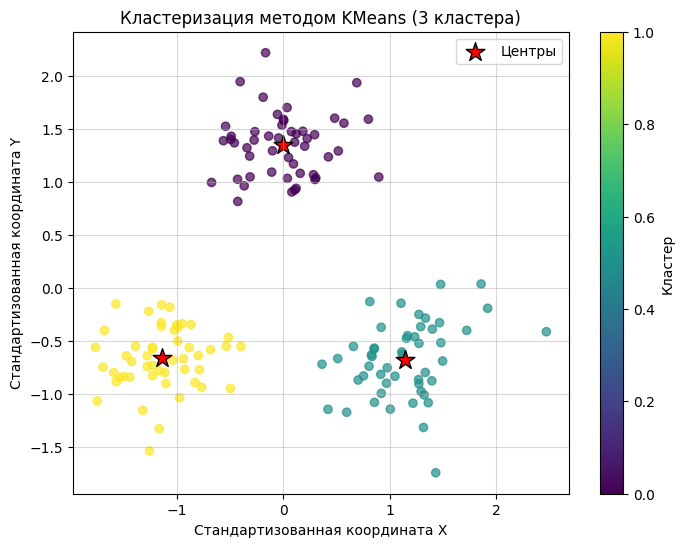

In [ ]:
# Задание 5
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# Раскраска точек по меткам кластеров
plt.scatter(df_standardized['x'], df_standardized['y'], c=labels, cmap='viridis', alpha=0.7)
# Отметка центров кластеров
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', marker='*', s=200, edgecolor='black', label='Центры')
# Оформление графика
plt.title('Кластеризация методом KMeans (3 кластера)')
plt.xlabel('Стандартизованная координата X')
plt.ylabel('Стандартизованная координата Y')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.colorbar(label='Кластер')
plt.show()

Алгоритм KMeans с числом кластеров k=3 успешно разделил данные на три хорошо различимые группы. Каждая группа: имеет свою область в пространстве признаков, крашена в свой цвет, имеет свой центр. Кластеры достаточно компактны и разделены. Точки внутри каждого кластера плотно сгруппированы вокруг своего центра. Между кластерами есть заметные промежутки — это говорит о хорошем разделении и низкой перекрываемости групп. Центры кластеров лежат в «серединах» своих групп

In [ ]:
# Задание 6
# Считаем коэффициент силуэта
score = silhouette_score(df_standardized, labels)
print(f"Коэффициент силуэта: {score:.4f}")

Коэффициент силуэта: 0.7242


с помощью метода silhouette_score был посчитан коэффициент силуэта равный 0.7242, такой результат указывает на хорошее качество кластеризации.

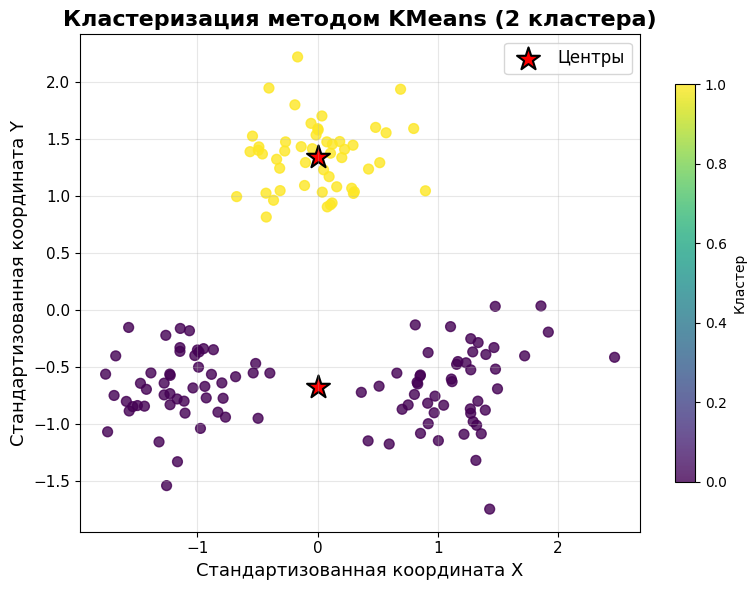

n_clusters = 2 → коэффициент силуэта = 0.4989


In [ ]:
# Задание 7
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# 1. Обучение KMeans
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(df_standardized)
# 2. Коэффициент силуэта
score_2 = silhouette_score(df_standardized, labels_2)
# 3. Визуализация
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_standardized['x'], df_standardized['y'],
                      c=labels_2, cmap='viridis', alpha=0.8, s=50)
centers_2 = kmeans_2.cluster_centers_
plt.scatter(centers_2[:, 0], centers_2[:, 1],
            c='red', marker='*', s=300, edgecolor='black', linewidth=1.5, label='Центры')
plt.title(f'Кластеризация методом KMeans (2 кластера)', fontsize=16, fontweight='bold')
plt.xlabel('Стандартизованная координата X', fontsize=13)
plt.ylabel('Стандартизованная координата Y', fontsize=13)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.colorbar(scatter, shrink=0.8, label='Кластер')
plt.tight_layout()
plt.show()
# Вывод
print(f"n_clusters = 2 → коэффициент силуэта = {score_2:.4f}")

Алгоритм KMeans был настроен на поиск двух групп. Коэффициент силуэта = 0.4989 — умеренное качество. Близко к 0.5, что означает умеренную степень разделения кластеров. Ниже, чем в предыдущем случае с 3 кластерами (где было 0.72), что говорит о худшем качестве разбиения.
Нижние две группы не лежат плотно вокруг своего центра,это говорит о том, что кластеризация на 2 группы не соответствует истинной структуре данных.

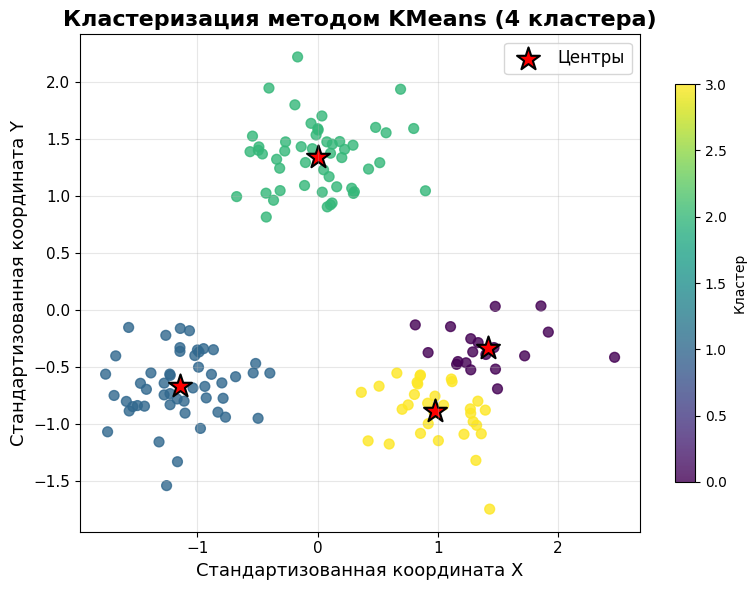

n_clusters = 4 → коэффициент силуэта = 0.6105


In [ ]:
# Задание 7
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# 1. Обучение KMeans
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(df_standardized)
# 2. Коэффициент силуэта
score_4 = silhouette_score(df_standardized, labels_4)
# 3. Визуализация
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_standardized['x'], df_standardized['y'],
                      c=labels_4, cmap='viridis', alpha=0.8, s=50)
centers_4 = kmeans_4.cluster_centers_
plt.scatter(centers_4[:, 0], centers_4[:, 1],
            c='red', marker='*', s=300, edgecolor='black', linewidth=1.5, label='Центры')
plt.title(f'Кластеризация методом KMeans (4 кластера)', fontsize=16, fontweight='bold')
plt.xlabel('Стандартизованная координата X', fontsize=13)
plt.ylabel('Стандартизованная координата Y', fontsize=13)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.colorbar(scatter, shrink=0.8, label='Кластер')
plt.tight_layout()
plt.show()
# Вывод
print(f"n_clusters = 4 → коэффициент силуэта = {score_4:.4f}")

Центры двух кластеров находятся близко, что говорит о слабой разделимости именно в этой области пространства. Это означает, что между кластерами есть некоторое пересечение, получается что алгоритм KMeans «разрезал» плотную группу данных на две части. Коэффициент силуэта = 0.6105 выше, чем у двух кластеров, но ниже, чем у трех.

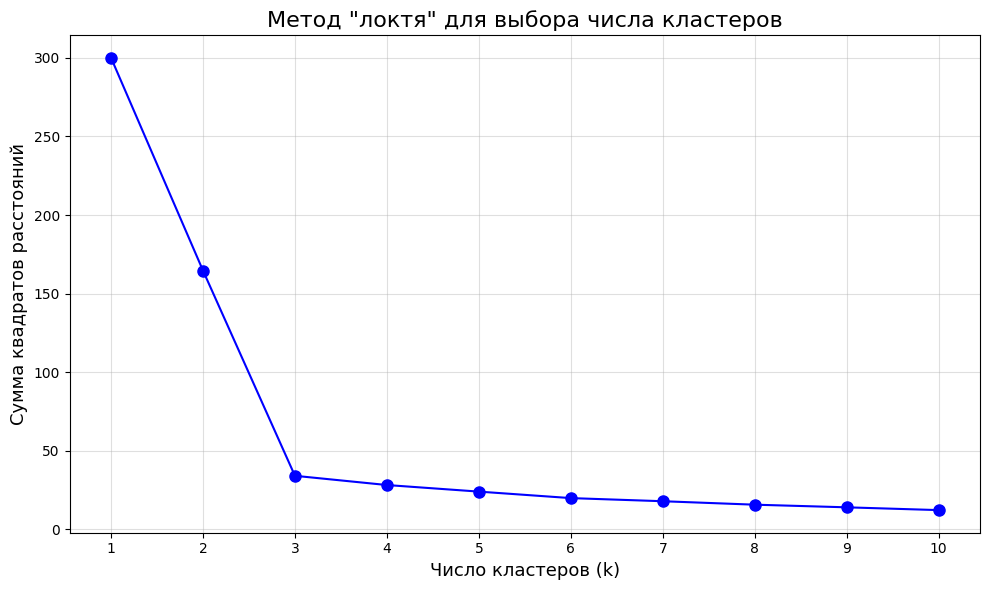

In [ ]:
# Задание 8
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Диапазон числа кластеров
k_range = range(1, 11)
inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_standardized)
    inertias.append(kmeans.inertia_)
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Метод "локтя" для выбора числа кластеров', fontsize=16)
plt.xlabel('Число кластеров (k)', fontsize=13)
plt.ylabel('Сумма квадратов расстояний', fontsize=13)
plt.grid(True, alpha=0.4)
plt.xticks(k_range)
plt.show()

Построен график метода «локтя», используемый для выбора оптимального числа кластеров k в алгоритме KMeans. Точка, где кривая начинает "выпрямляться" — то есть прирост качества становится незначительным - 3. Получается оптимальное число кластеров 3.

Часть 2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving telecom_churn.csv to telecom_churn (1).csv


In [ ]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,age,gender,contract_type,payment_method,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,has_international_plan,region,Churn
0,53,M,Month-to-month,Bank transfer,58,56.46,3448.16,206.9,0,No,North,0
1,18,F,Month-to-month,Electronic check,16,64.86,1227.48,345.3,2,Yes,West,1
2,81,M,Month-to-month,Electronic check,59,97.64,5773.27,242.8,0,No,North,0
3,65,F,One year,Credit card,16,27.90,416.11,257.2,0,Yes,North,0
4,40,F,Month-to-month,Electronic check,65,56.33,3805.53,205.1,1,No,North,0


Чтение файла и вывод первых пяти строк с помощью метода head().

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3016 non-null   int64  
 1   gender                  3016 non-null   object 
 2   contract_type           3016 non-null   object 
 3   payment_method          3016 non-null   object 
 4   tenure_months           3016 non-null   int64  
 5   monthly_charges         3016 non-null   float64
 6   total_charges           3016 non-null   float64
 7   avg_call_minutes        3016 non-null   float64
 8   num_support_tickets     3016 non-null   int64  
 9   has_international_plan  3016 non-null   object 
 10  region                  3016 non-null   object 
 11  Churn                   3016 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 282.9+ KB


Оценка данных с помощью метода info.

In [ ]:
df.describe()

,age,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,Churn
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000
mean,51.519231,37.021220,67.878336,2499.773856,249.071320,0.906830,0.159483
std,19.202550,21.228354,26.120795,1797.004026,78.856929,1.016745,0.366186
min,18.000000,0.000000,5.000000,-84.310000,20.000000,0.000000,0.000000
25%,35.750000,19.000000,50.557500,1048.630000,196.450000,0.000000,0.000000
50%,51.000000,37.000000,67.170000,2194.135000,247.600000,1.000000,0.000000
75%,68.000000,55.000000,84.870000,3677.967500,303.100000,1.000000,0.000000
max,84.000000,74.000000,222.034000,11620.220000,499.600000,6.000000,1.000000


Оценка числовых данных с помощью метода describe

In [ ]:
print(df.isna().sum())

age                       0
gender                    0
contract_type             0
payment_method            0
tenure_months             0
monthly_charges           0
total_charges             0
avg_call_minutes          0
num_support_tickets       0
has_international_plan    0
region                    0
Churn                     0
dtype: int64


С помощью метода isna().sum() происходит подсчет пропусков

In [ ]:
df[df.duplicated()]

,age,gender,contract_type,payment_method,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,has_international_plan,region,Churn


С помощью метода duplicated() происходит проверка на явные дубликаты

In [ ]:
columns_to_check=['gender','contract_type', 'payment_method', 'has_international_plan', 'region']
for x in columns_to_check:
  print(x,":","\n", df[x].unique(),"\n")

gender : 
 ['M' 'F'] 

contract_type : 
 ['Month-to-month' 'One year' 'Two year'] 

payment_method : 
 ['Bank transfer' 'Electronic check' 'Credit card' 'Mailed check'] 

has_international_plan : 
 ['No' 'Yes'] 

region : 
 ['North' 'West' 'East' 'South' 'Central'] 



Проверка неявных дубликатов

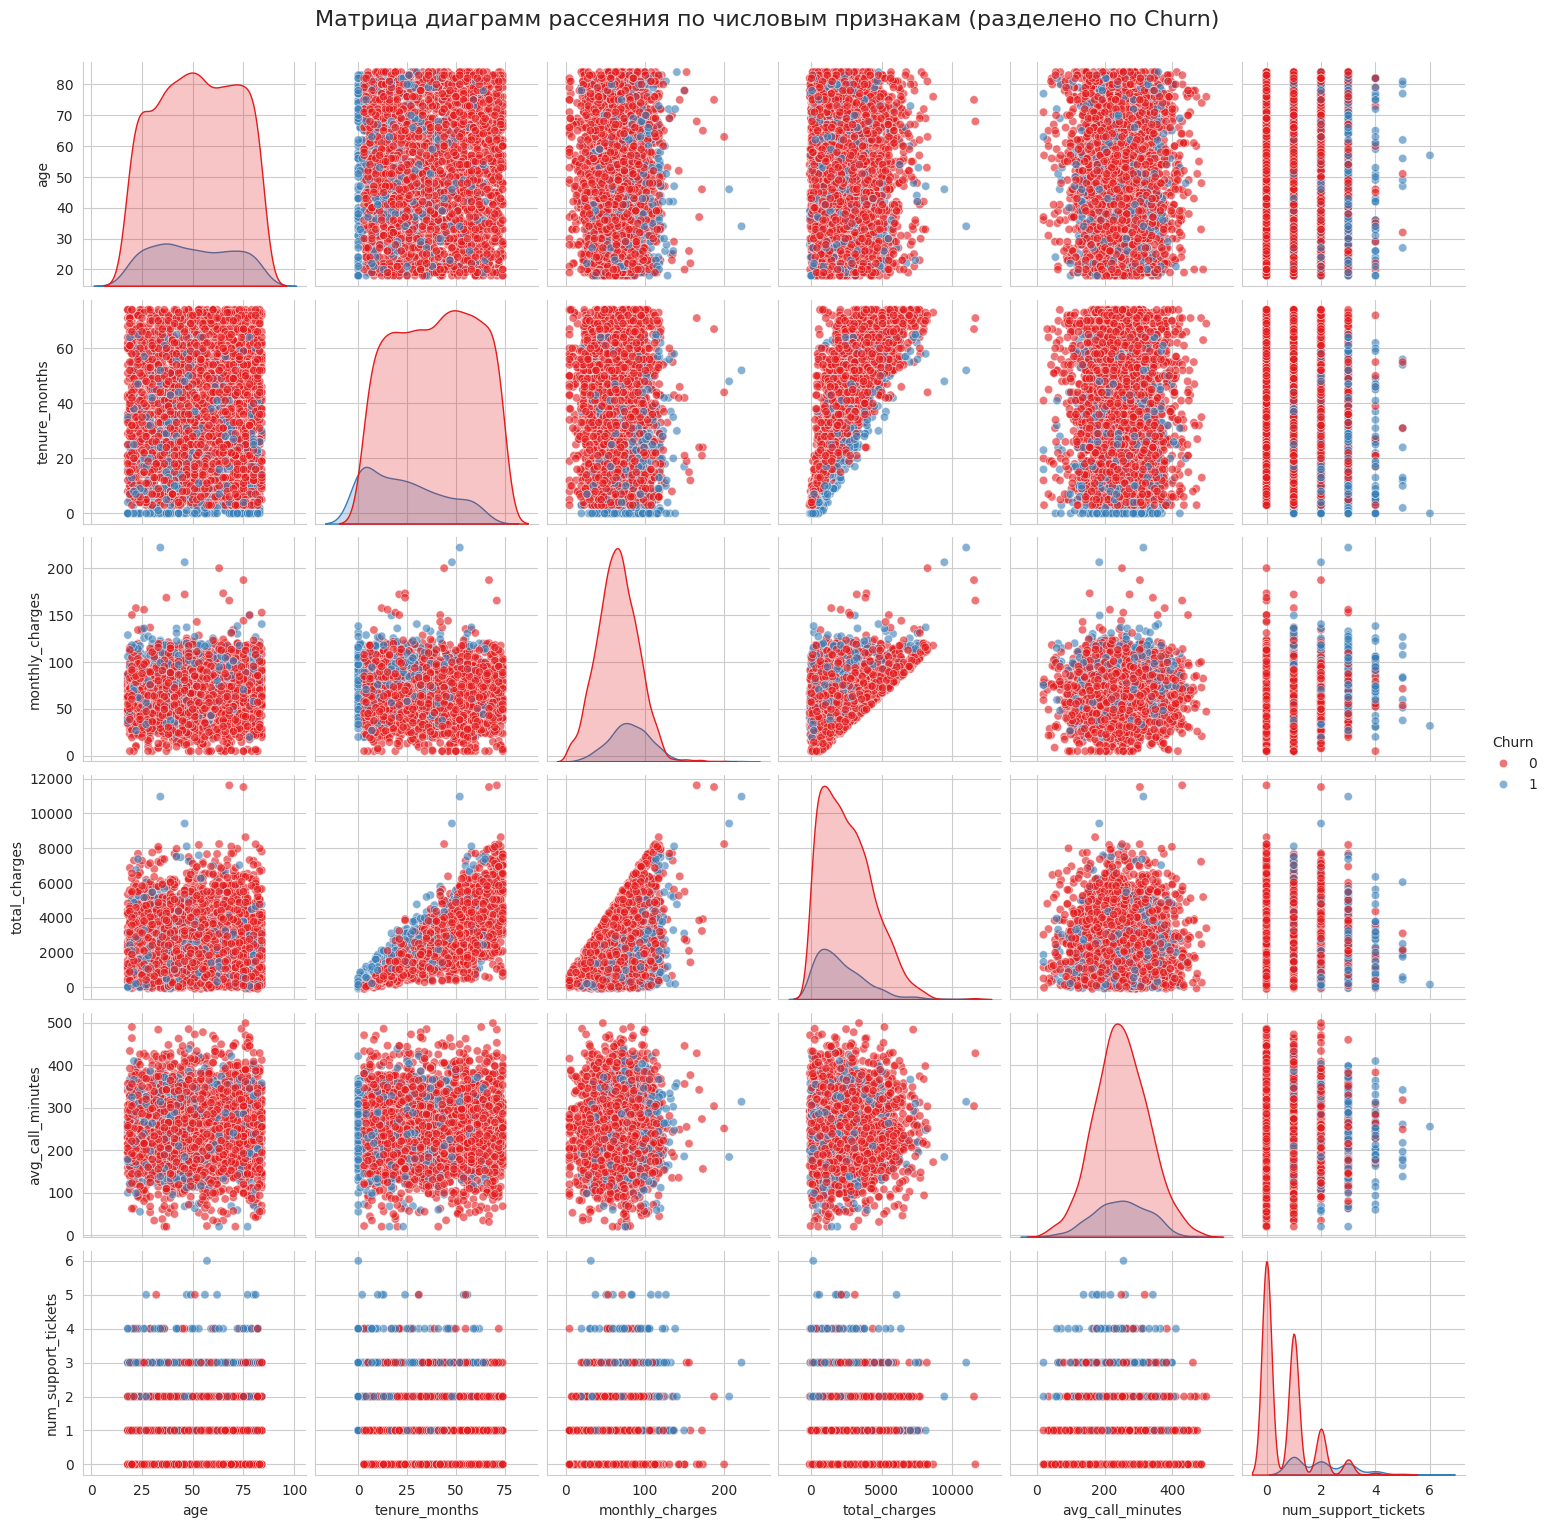

In [ ]:
# Задание 3
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Выделяем целевую переменную
y = df['Churn']
X = df.drop('Churn', axis=1)
# 2. Выберем только числовые признаки для pairplot
numeric_cols = ['age', 'tenure_months', 'monthly_charges', 'total_charges', 'avg_call_minutes', 'num_support_tickets']
# 3. Строим pairplot, раскрашивая по Churn
sns.set_style("whitegrid")
g = sns.pairplot(df[numeric_cols + ['Churn']], hue='Churn', palette='Set1', plot_kws={'alpha': 0.6})
# Улучшаем оформление
g.fig.suptitle('Матрица диаграмм рассеяния по числовым признакам (разделено по Churn)', y=1.02, fontsize=16)
plt.show()

Выполняется матрица диаграмм рассеяния, где каждая ячейка показывает взаимосвязь между двумя признаками, а точки окрашены по значению целевой переменной — Churn, где 1(синий) - ушел, 0(красный) - остался

In [ ]:
df_original = df.copy()

In [ ]:
# Задание 4
# Стандартизация
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

С помощью StandardScaler() выполняется стандартизация данных

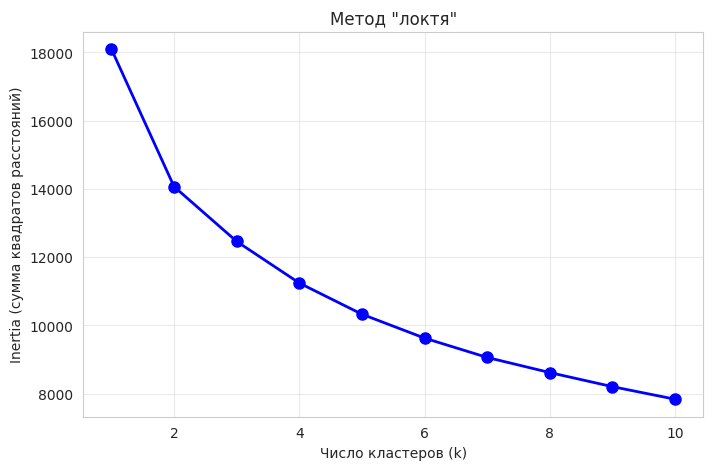

In [ ]:
# Задание 5
X = df[numeric_cols]
# Метод локтя: пробуем от 1 до 10 кластеров
inertias = []
K_values = range(1, 11)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
# Строим график
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertias, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Число кластеров (k)')
plt.ylabel('Inertia (сумма квадратов расстояний)')
plt.title('Метод "локтя"')
plt.grid(True, alpha=0.4)
plt.show()

Построен график метода «локтя», используемый для выбора оптимального числа кластеров k в алгоритме KMeans. Точка, где кривая начинает "выпрямляться" — то есть прирост качества становится незначительным - 2. Получается оптимальное число кластеров 2.

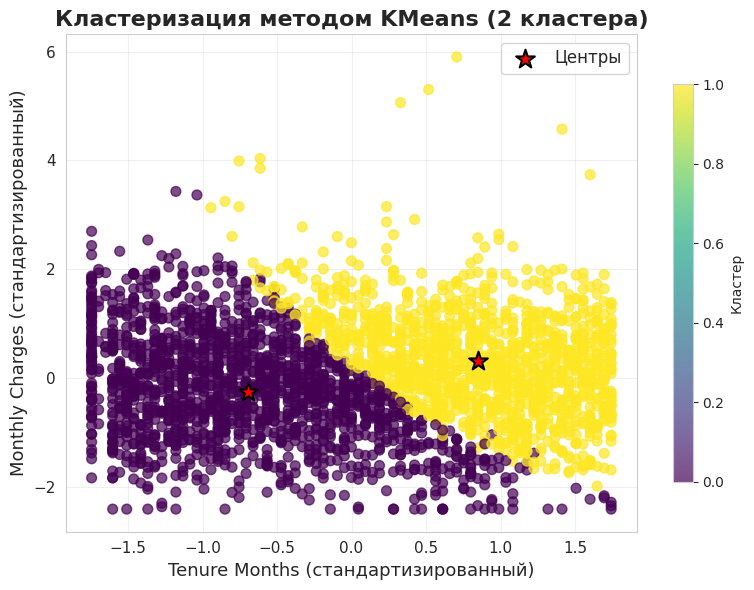

n_clusters = 2 → коэффициент силуэта = 0.2081


In [ ]:
# Задание 5
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# 1. Обучение KMeans
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(df[numeric_cols])
# 2. Коэффициент силуэта
score_2 = silhouette_score(df[numeric_cols], labels_2)
# 3. Визуализация
plt.figure(figsize=(8, 6))
# Выбираем два признака для визуализации
x_feature = 'tenure_months'
y_feature = 'monthly_charges'
X_scaled = df[numeric_cols].values
scatter = plt.scatter(X_scaled[:, numeric_cols.index(x_feature)],
                      X_scaled[:, numeric_cols.index(y_feature)],
                      c=labels_2, cmap='viridis', alpha=0.7, s=50)
# Центры — тоже в стандартизованном пространстве
centers_scaled = kmeans_2.cluster_centers_
plt.scatter(centers_scaled[:, numeric_cols.index(x_feature)],
            centers_scaled[:, numeric_cols.index(y_feature)],
            c='red', marker='*', s=200, edgecolor='black', linewidth=1.5, label='Центры')
# Оформление
plt.title(f'Кластеризация методом KMeans (2 кластера)', fontsize=16, fontweight='bold')
plt.xlabel(f'{x_feature.replace("_", " ").title()} (стандартизированный)', fontsize=13)
plt.ylabel(f'{y_feature.replace("_", " ").title()} (стандартизированный)', fontsize=13)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.colorbar(scatter, shrink=0.8, label='Кластер')
plt.tight_layout()
plt.show()
# Вывод метрики
print(f"n_clusters = 2 → коэффициент силуэта = {score_2:.4f}")

Визуальная проверка результатов кластеризации позволяет увидеть, насколько хорошо алгоритм разделил данные. Точки перемешаны — плохо.
KMeans ищет сферические кластеры, но здесь: данные вытянуты, имеют наклонную структуру, нет двух чётких компактных групп. Алгоритм вынужденно “режет” облако диагональной линией, потому что в данных нет двух нормально разделяющихся плотностей. Фиолетовые точки продолжаются далеко вправо, жёлтые — далеко влево,
в центре сильное смешение. В итоге кластеризация выполнена плохо.

In [ ]:
# Задание 6
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_original['cluster'] = kmeans.fit_predict(df[numeric_cols])

# 2. Кол-во объектов в каждом кластере
display(df_original['cluster'].value_counts().sort_index().to_frame(name='Количество'))

# 3. Средние значения по каждому признаку в каждом кластере
cluster_means = df_original.groupby('cluster')[numeric_cols].mean().round(2)
display(cluster_means.style.set_caption("Средние значения признаков по кластерам").format(precision=2))


,Количество
cluster,
0,1657
1,1359


,age,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets
cluster,,,,,,
0,50.84,22.21,61.17,1180.45,248.38,0.95
1,52.35,55.08,76.06,4108.40,249.92,0.85


Модель обучается и применяется к набору числовых признаков (numeric_cols), после чего предсказанные метки кластеров добавляются в исходный датафрейм df в новый столбец 'cluster'. С помощью метода value_counts() подсчитывается количество объектов в каждом кластере. Результат выводится в виде таблицы с сортировкой по индексу (от кластера 0 к кластеру 1). Для каждого кластера вычисляются средние значения всех числовых признаков с помощью группировки по метке кластера (groupby('cluster')). Результаты округляются до двух знаков после запятой

In [ ]:
# Задание 7
from sklearn.metrics import silhouette_score

# Метки кластеров
labels = df['cluster']

# Считаем
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, labels)

print(f"Метрики качества кластеризации:")
print(f"Inertia:          {inertia:.2f}")
print(f"Silhouette Score:  {silhouette_avg:.4f}")

Метрики качества кластеризации:
Inertia:          14067.90
Silhouette Score:  0.2081


Для оценки качества выполненной кластеризации рассчитаны две ключевые метрики: Inertia (инерция): 14067.90 - показывает сумму квадратов расстояний от каждой точки до центроида её кластера. Чем ниже значение — тем плотнее кластеры. Silhouette Score (коэффициент силуэта): 0.2081 - характеризует, насколько хорошо объекты разделены на кластеры. Значение близко к 0, что указывает на слабое разделение кластеров

In [ ]:
# Задание 7
# Внешние метрики
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Истинные метки — Churn (0 или 1)
true_labels = df['Churn']

# Оценка схожести кластеров и Churn
ari = adjusted_rand_score(true_labels, labels)
ami = adjusted_mutual_info_score(true_labels, labels)

print(f"\nСравнение с целевой переменной Churn:")
print(f"Adjusted Rand Index (ARI):       {ari:.4f}")
print(f"Adjusted Mutual Info (AMI):      {ami:.4f}")


Сравнение с целевой переменной Churn:
Adjusted Rand Index (ARI):       -0.0039
Adjusted Mutual Info (AMI):      0.0153


Для оценки согласованности между полученными кластерами и известной целевой переменной Churn (факт ухода клиента) рассчитаны две внешние метрики качества:
Adjusted Rand Index (ARI): –0.0039 - измеряет степень совпадения разбиений с поправкой на случайное согласование. Отрицательное значение указывает на случайное или даже противоположное совпадение. Adjusted Mutual Info (AMI):     0.0153 - оценивает, насколько информация о кластерах согласуется с информацией о метках Churn. Значение близко к 0 говорит о том, что кластеры почти не содержат полезной информации о целевой переменной.

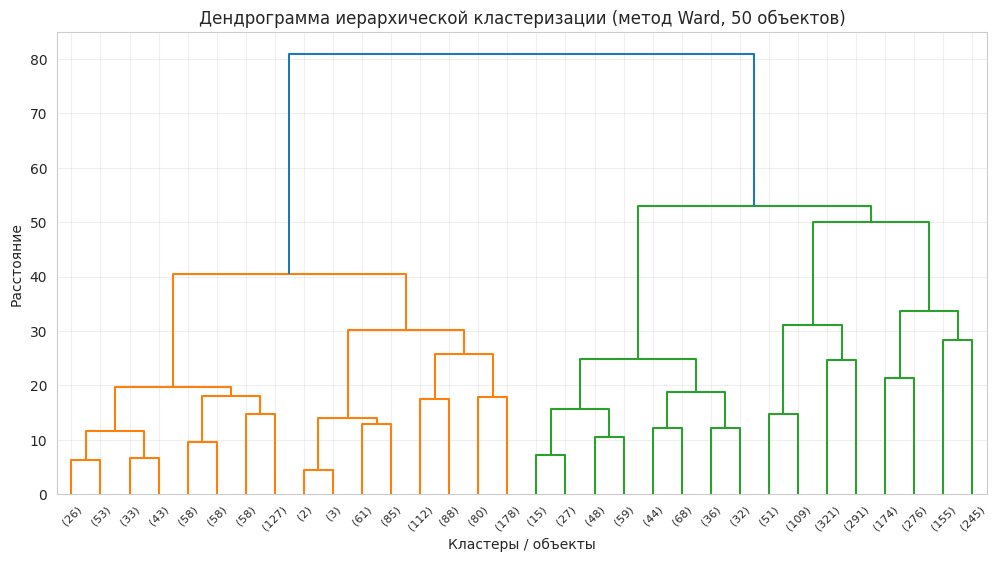

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Берём стандартизованные числовые признаки
X = df[numeric_cols].values

# Строим дендрограмму
linkage_matrix = linkage(X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.title('Дендрограмма иерархической кластеризации (метод Ward, 50 объектов)')
plt.xlabel('Кластеры / объекты')
plt.ylabel('Расстояние')
plt.grid(True, alpha=0.3)
plt.show()

На представленном графике изображена дендрограмма, полученная в результате проведения иерархической кластеризации по методу Уорда для выборки из 50 объектов. Дендрограмма отражает процесс последовательного объединения объектов или кластеров на основе минимизации внутрикластерной дисперсии. Параметр p=4 в сочетании с truncate_mode='level' отображает только верхние 4 уровня иерархии объединения кластеров, начиная с самых крупных групп, и скрыть более мелкие подразделения на нижних уровнях.

In [ ]:
# Подбор k по силуэту
silhouette_scores = []
k_range = range(2, 6)

for k in k_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels_agg = agg.fit_predict(X)
    score = silhouette_score(X, labels_agg)
    silhouette_scores.append(score)
    print(f"k = {k} → Silhouette = {score:.4f}")

# Выбираем k с максимальным силуэтом
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nОптимальное k по силуэту: {best_k}")

k = 2 → Silhouette = 0.1708
k = 3 → Silhouette = 0.1595
k = 4 → Silhouette = 0.1352
k = 5 → Silhouette = 0.1050

Оптимальное k по силуэту: 2


Самый большой коэффициент силуета = 0.1708 у k=2, поэтому k=2  является оптимальным числом кластеров

In [ ]:
k_final = 2

# Обучаем финальную модель
agg_final = AgglomerativeClustering(n_clusters=k_final)
df_original['cluster_hier'] = agg_final.fit_predict(X)

# Средние значения по кластерам
print(f"\n Средние значения по кластерам (иерархическая кластеризация, k={k_final}):")
cluster_means_hier = df_original.groupby('cluster_hier')[numeric_cols].mean()
display(cluster_means_hier.round(2))


 Средние значения по кластерам (иерархическая кластеризация, k=2):


,age,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets
cluster_hier,,,,,,
0,50.35,26.61,62.51,1515.21,247.87,0.97
1,53.67,56.09,77.72,4303.43,251.27,0.78


Используется алгоритм иерархической кластеризации AgglomerativeClustering с параметром n_clusters=2. Модель обучается на стандартизированных признаках (X), после чего каждому объекту присваивается метка кластера (0 или 1). Результат кластеризации сохраняется в новый столбец датафрейма df под названием 'cluster_hier'. Для каждого из двух кластеров вычисляются средние значения по всем числовым признакам (numeric_cols) с помощью группировки по метке кластера. Значения округляются до двух знаков после запятой.

In [ ]:
# Метки
labels_hier = df['cluster_hier']
true_labels = df['Churn']

# Внутренняя метрика
sil_hier = silhouette_score(X, labels_hier)

# Внешние метрики (сравнение с Churn)
ari_hier = adjusted_rand_score(true_labels, labels_hier)
ami_hier = adjusted_mutual_info_score(true_labels, labels_hier)

# Вывод
print(f"\nМетрики качества (иерархическая кластеризация, k={k_final}):")
print(f"Silhouette Score:               {sil_hier:.4f}")
print(f"Adjusted Rand Index (ARI):      {ari_hier:.4f}")
print(f"Adjusted Mutual Info (AMI):      {ami_hier:.4f}")


Метрики качества (иерархическая кластеризация, k=2):
Silhouette Score:               0.1708
Adjusted Rand Index (ARI):      -0.0301
Adjusted Mutual Info (AMI):      0.0175


Silhouette Score = 0.1708 - низкий коэффициент силуета, говорит о том, что плохо выполнена иерархическая кластеризация.
Рассчитаны две внешние метрики качества:
Adjusted Rand Index (ARI): –0.0301 - измеряет степень совпадения разбиений с поправкой на случайное согласование. Отрицательное значение указывает на случайное или даже противоположное совпадение. Adjusted Mutual Info (AMI):     0.0175 - оценивает, насколько информация о кластерах согласуется с информацией о метках Churn. Значение близко к 0 говорит о том, что кластеры почти не содержат полезной информации о целевой переменной.

Вывод
В данной лабораторной работе был применен метод кластеризации. В первой части работы была написана функция, которая генерирует набор данных, два признака и три кластера. Выбор трех кластеров с помощью метода локтя было оптимальным решением, поскольку объекты правильно разделились по кластерам, между центрами было достаточное расстояние. Была произведена работа с внешними и внутренними метриками кластеризации. Во второй части, по методу локтя и коэффициента силуэта  было выбрано 2 кластера, но, к сожалению, объекты были разделены плохо, кластеры имели граничащую линию, на ней некоторые объекты попадали не в свой кластер. Также была построена дендрограмма.

Дополнительные задания:

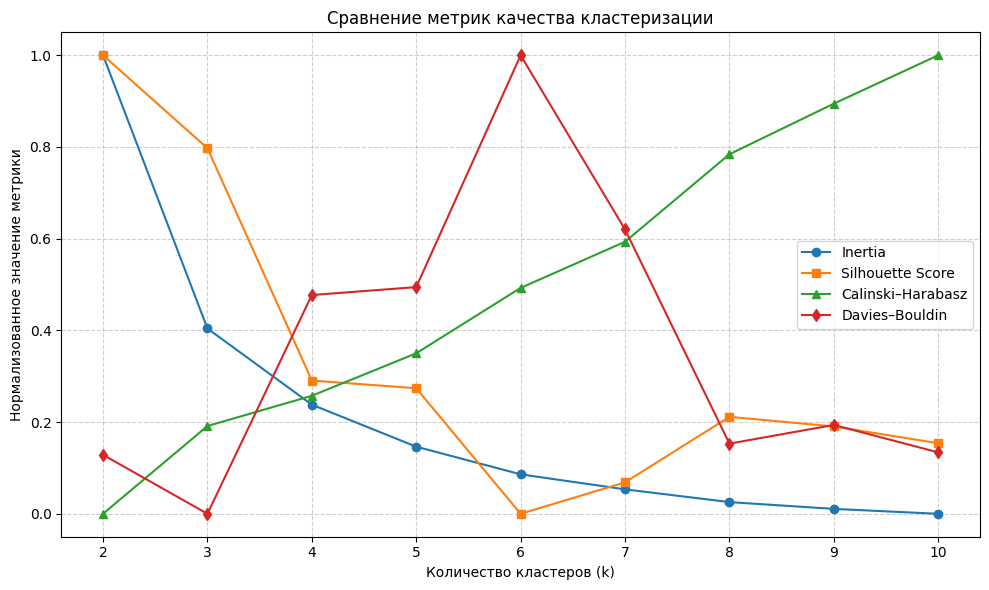

In [ ]:
# Задание 6
import numpy as np
import pandas as pd

# Генерация данных
df = make_data(n=100, seed=42)
X = df[['x', 'y']].values

# Импорты для кластеризации и метрик
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
import matplotlib.pyplot as plt

# Диапазон количества кластеров
k_range = range(2, 11)

# Списки для метрик
inertias = []
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Цикл по k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))

# Нормализация для отображения на одном графике
def normalize(arr):
    arr = np.array(arr)
    return (arr - arr.min()) / (arr.max() - arr.min() + 1e-12)

norm_inertias = normalize(inertias)
norm_silhouette = normalize(silhouette_scores)
norm_ch = normalize(calinski_harabasz_scores)
norm_db = normalize(davies_bouldin_scores)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(k_range, norm_inertias, label='Inertia', marker='o')
plt.plot(k_range, norm_silhouette, label='Silhouette Score', marker='s')
plt.plot(k_range, norm_ch, label='Calinski–Harabasz', marker='^')
plt.plot(k_range, norm_db, label='Davies–Bouldin', marker='d')

plt.xlabel('Количество кластеров (k)')
plt.ylabel('Нормализованное значение метрики')
plt.title('Сравнение метрик качества кластеризации')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

На графике показаны 4 метрики (нормализованные от 0 до 1) в зависимости от числа кластеров k от 2 до 10: Inertia (синяя линия) — монотонно убывает с ростом k, что ожидаемо: чем больше кластеров, тем меньше расстояние до центроидов. Silhouette Score (оранжевая) — имеет максимум при k=2, затем резко падает, потом слабо растёт снова. Это необычно — обычно Silhouette достигает максимума при "истинном" числе кластеров. Calinski-Harabasz (зелёная) — монотонно растёт с увеличением k. Это может указывать на то, что данные плохо разделяются или метрика неустойчива при малых k. Davies-Bouldin (красная) — минимальное значение (лучшее качество) при k=3, затем растёт, потом падает снова.

In [ ]:
# Задание 7
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Параметры кластеризации
n_clusters = 3
random_state = 42

# Словарь скалеров
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

# Список для хранения результатов
results = []

# Для каждого скалера
for name, scaler in scalers.items():
    # Нормализация
    X_scaled = scaler.fit_transform(df)

    # Кластеризация
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    # Метрики
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X_scaled, labels)
    ch_score = calinski_harabasz_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)

    results.append({
        'Scaler': name,
        'Inertia (WCSS)': inertia,
        'Silhouette Score': sil_score,
        'Calinski-Harabasz': ch_score,
        'Davies-Bouldin': db_score
    })

# Вывод сравнительной таблицы
results_df = pd.DataFrame(results)
results_df.round(4)

,Scaler,Inertia (WCSS),Silhouette Score,Calinski-Harabasz,Davies-Bouldin
0,StandardScaler,70.6693,0.7186,1112.3027,0.3775
1,MinMaxScaler,4.4814,0.7157,1179.3145,0.3918
2,MaxAbsScaler,4.1367,0.7163,1174.3010,0.3903


Наиболее эффективным методом нормализации для задачи кластеризации в данном случае является StandardScaler.
Несмотря на то, что MinMaxScaler и MaxAbsScaler показывают меньшие значения Inertia и более высокий Calinski-Harabasz Index, эти метрики искажены из-за изменения масштаба данных.
Ключевая метрика — Silhouette Score — демонстрирует наилучшее качество кластеризации при использовании StandardScaler (0.7186), а также подтверждается наименьшим значением Davies-Bouldin Index (0.3775), что указывает на более компактные и хорошо разделённые кластеры.


In [ ]:
# Задание 10
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Нормализация (лучший вариант из предыдущего анализа)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = np.nan_to_num(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=4)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Уникальные кластеры и шум
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)

print(f"Найдено кластеров: {n_clusters}")
print(f"Точек-выбросов (шум): {n_noise}")

Найдено кластеров: 3
Точек-выбросов (шум): 1


In [ ]:
if n_clusters >= 2 and n_noise < len(labels_dbscan):
    mask = labels_dbscan != -1
    X_clean = X_scaled[mask]
    labels_clean = labels_dbscan[mask]

    sil_dbscan = silhouette_score(X_clean, labels_clean)

    print(f"Silhouette Score: {sil_dbscan:.4f}")

else:
    sil_dbscan = ch_dbscan = db_dbscan = np.nan
    print("\nНевозможно вычислить метрики: недостаточно кластеров или только шум.")

Silhouette Score: 0.7213


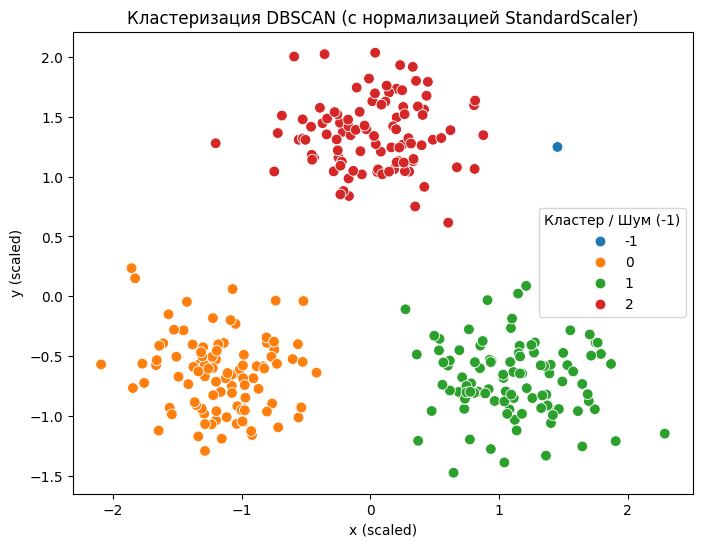

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=labels_dbscan,
    palette='tab10',
    legend='full',
    s=60
)
plt.title('Кластеризация DBSCAN (с нормализацией StandardScaler)')
plt.xlabel('x (scaled)')
plt.ylabel('y (scaled)')
plt.legend(title='Кластер / Шум (-1)')
plt.show()

Оба метода — K-Means и DBSCAN — продемонстрировали высокое и сопоставимое качество кластеризации:
K-Means: Silhouette = 0.7242
DBSCAN: Silhouette = 0.7213
Разница статистически и практически незначительна, но значение коэффициента силуэта выше в методе K-Means. Однако DBSCAN обладает ключевым преимуществом: он обнаружил выбросы.
Таким образом, если цель — разведочный анализ и выявление аномалий, предпочтителен DBSCAN.
Если же требуется чёткое, воспроизводимое разбиение на фиксированное число групп, лучше использовать K-Means.

DBSCAN — это плотностный алгоритм кластеризации. В отличие от методов вроде K-Means, он: не требует задания числа кластеров заранее, автоматически обнаруживает выбросы (шум), находит кластеры произвольной формы.
Работа алгоритма:
Выбирается произвольная непосещённая точка.
Подсчитывается число соседей в радиусе eps.
Если соседей ≥ min_samples — создаётся новый кластер, и все соседи добавляются в него; рекурсивно расширяется кластер через соседей-ядра.
Если соседей < min_samples — точка помечается как шум (но может позже стать граничной, если окажется в окрестности ядра).
Процесс повторяется, пока все точки не будут обработаны